<a href="https://colab.research.google.com/github/TheJojoJoseph/Assignment1_CSL7390_Jojo_g23ai2100/blob/main/Assignment1_CSL7390_Jojo_g23ai2100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASSIGNMENT 1 - 100 MARKS

1. Mention the version of packages (like networkx) you are using.
2. This notebook will be converted to a python script for plagiarism check. So the name of the notebook should only be your rollnumber followed by assignment number. Ex <M21AI004_Ass1.ipynb>. Any other naming convention will carry penalty.
4. In case there is plagiarism all the students whose code is same will be awarded 0.
5. You are adviced to not copy your code from ChatGPT. If found you will be awarded 0.
5. You are adviced to read BOOK 3: Networks, Crowds, and Markets, Chapter 5 for this assignment.

# Q1 [40 marks]

Load the email_eu.txt edge list and convert this to a Networkx Graph [5 marks]

In [20]:
# !wget https://github.com/TheJojoJoseph/Assignment1_CSL7390_Jojo_g23ai2100/blob/main/email-Eu-core.txt #I have downloaded this file earlier.
fileName = 'email-Eu-core (2).txt'


# from google.colab import files
# uploaded = files.upload()


#check
with open(fileName, 'r') as file:
    lines = file.readlines()
for line in lines[:5]:
    print(line.strip())

0 1
2 3
2 4
5 6
5 7


Plot the degree distribution of the Graph [10 marks]

Graph with 1005 nodes and 16706 edges
[44, 52, 95, 71, 96, 171, 115, 72, 37, 40, 47, 76, 58, 180, 80, 52, 74, 111, 56, 72, 74, 138, 15, 81, 40, 33, 35, 63, 105, 58, 68, 50, 35, 30, 31, 59, 45, 37, 47, 36, 60, 91, 75, 14, 106, 48, 73, 51, 59, 15, 17, 69, 26, 40, 51, 43, 48, 67, 126, 53, 55, 71, 216, 125, 170, 91, 36, 9, 48, 64, 18, 18, 8, 31, 93, 22, 24, 25, 23, 44, 72, 113, 233, 141, 132, 39, 218, 139, 33, 71, 29, 31, 44, 87, 44, 48, 120, 25, 25, 29, 41, 29, 23, 52, 33, 146, 142, 221, 43, 5, 11, 8, 21, 87, 142, 131, 83, 20, 32, 14, 19, 234, 27, 36, 44, 29, 35, 28, 146, 164, 37, 60, 63, 108, 25, 38, 29, 85, 32, 40, 41, 83, 141, 51, 15, 71, 30, 50, 20, 30, 39, 46, 69, 52, 54, 78, 23, 79, 49, 38, 347, 43, 64, 52, 48, 119, 177, 70, 77, 119, 98, 45, 92, 83, 73, 11, 35, 54, 36, 55, 83, 61, 47, 173, 80, 22, 31, 54, 41, 76, 34, 62, 23, 28, 46, 37, 35, 37, 38, 51, 36, 57, 7, 39, 37, 31, 61, 30, 53, 85, 86, 154, 121, 48, 53, 92, 29, 24, 68, 18, 18, 61, 72, 58, 15, 30, 63, 20, 22, 33, 23, 64, 91,

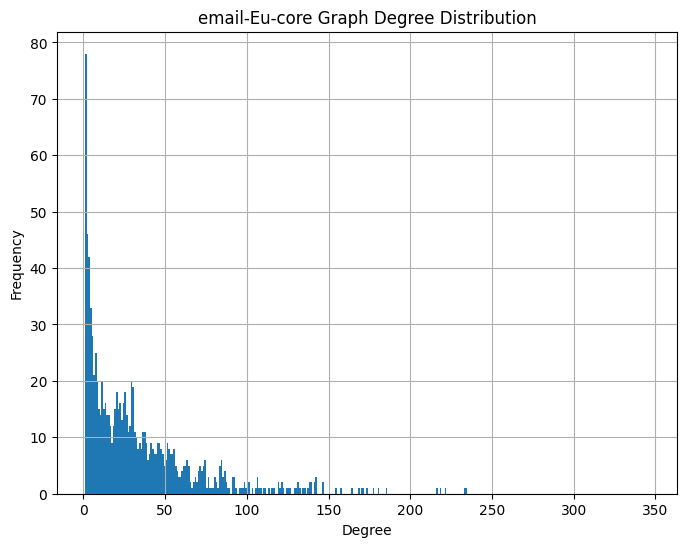

In [24]:
import matplotlib.pyplot as plt
import networkx as nx
G = nx.read_edgelist(fileName)
degrees = [G.degree(n) for n in G.nodes()]
print(G)
print(degrees)




# nx.draw(
#     G,
#     with_labels=True,
#     node_size=100,
#     font_size=10,
# )
# plt.title("")
# plt.show()



#degree-distribution
plt.figure(figsize=(8, 6))
plt.hist(degrees, bins=range(min(degrees), max(degrees)))
plt.title('email-Eu-core Graph Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


For a random k between 0-20 find all the k-cores in the network [25 marks]

In [28]:
def kcore(graph, k):
    kcores = graph.copy()
    while True:
        nodes_remove = [node for node in kcores if kcores.degree(node) < k]
        if not nodes_remove:
            break
        kcores.remove_nodes_from(nodes_remove)
    return kcores

# Q2 [60 marks]

***Positive Edge Component (Supernode)***:  A supernode is connected internally via positive edges, and the only edges going between two different supernodes are negative. If there were a positive edge linking two different supernodes, we should have combined them together into a single
supernode.
For example in Figure 2 we can see that [9, 7, 12, 10, 13] can be considered to be a supernode with positive edges.

Cosider a networkx signed *graph* in ***Figure 1***


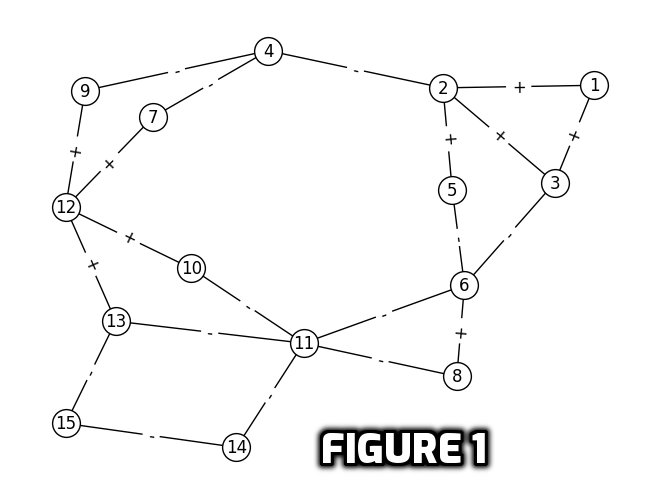

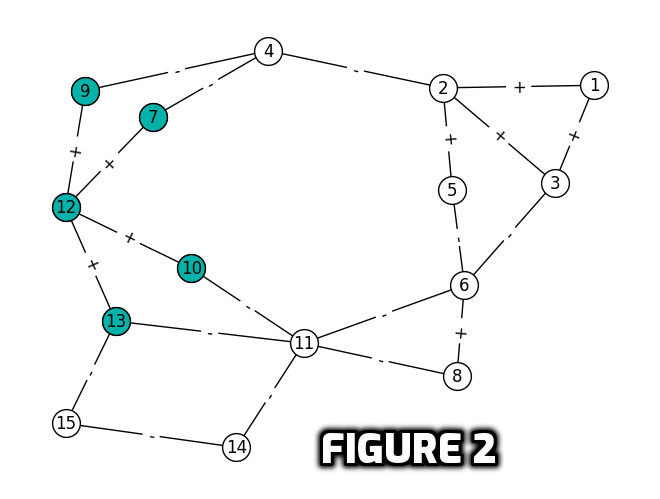

1. Write a code which takes a Networkx graph as input and outputs all the positive edge components or supernodes (The definition of supernodes is mentioned above). For more details you can refer to the network book - **Book 3 (Networks, Crowds, and Markets:), Chapter 5, Page 153 (138 in book)**.

NOTE: The supernodes should be in a list format example if there are three supernodes then we should return [[a, b, c], [d, e, f], [g]] where [a,b,c] is a supernode, [d,e,f] is a supernode and [g] is a supernode. [20 marks]

In [34]:
def create_graph():
  graph = nx.Graph()
  nodes = list(range(1, 15))
  graph.add_nodes_from(nodes)
 #based on Fig1
  edges = [
        (1, 2, "+"), (1, 3, "+"), (2, 3, "+"), (2, 5, "+"), (2, 4, "-"),
        (3, 6, "-"), (5, 6, "-"), (6, 11, "-"), (6, 8, "+"), (8, 11, "-"),
        (11, 10, "-"), (11, 13, "-"), (11, 14, "-"), (10, 12, "+"),
        (13, 12, "+"), (13, 15, "-"), (14, 15, "-"), (12, 7, "+"),
        (12, 9, "+"), (7, 4, "-"), (9, 4, "-")
    ]
  graph.add_nodes_from(range(1, 16))
  edge_label =[]
  graph.add_edges_from([(u, v, {'sign': sign}) for u, v, sign in edges])
  return graph

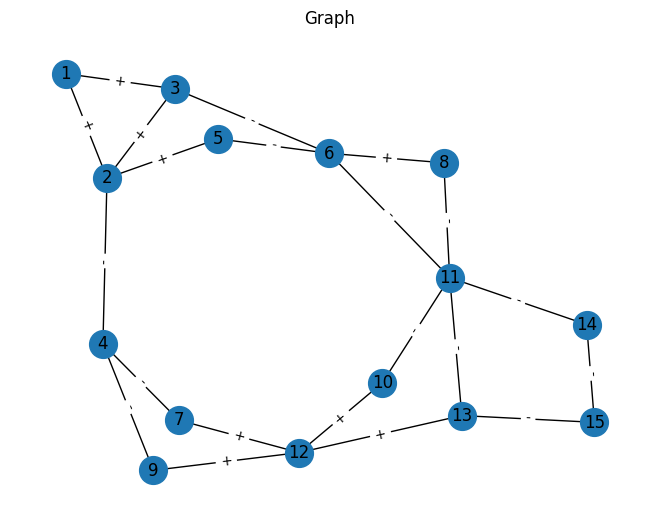

In [54]:
#test
GTest = create_graph()
pos = nx.spring_layout(GTest, seed=42)
nx.draw(GTest, pos, with_labels=True,
        node_size=400)
edge_labels = nx.get_edge_attributes(GTest, 'sign')
nx.draw_networkx_edge_labels(GTest, pos, edge_labels=edge_labels)
plt.title('Graph')
plt.show()

2. Now that you have found out the components (supernodes), write code that highlights the components as shown in Figure 2. Nodes in the same component must have the same color. [10 marks]

[{1, 2, 3, 5}, {8, 6}, {7, 9, 10, 12, 13}]
Graph with 15 nodes and 21 edges
[{1, 2, 3, 5}, {8, 6}, {7, 9, 10, 12, 13}]


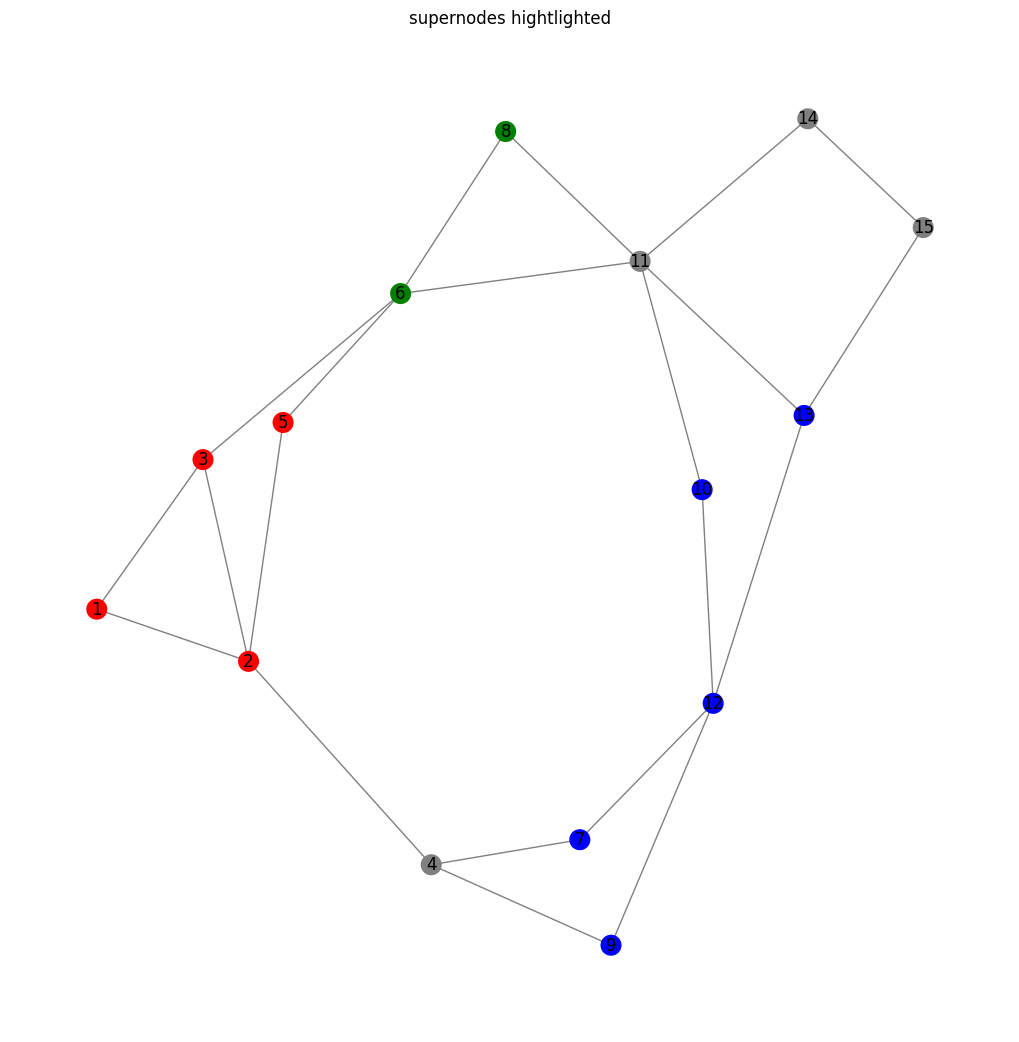

In [55]:
def pos_components(G):
    pos_components = nx.Graph()
    for u, v, d in G.edges(data=True):
        if d['sign'] == "+":
            pos_components.add_edge(u, v)
    super_nodes = list(nx.connected_components(pos_components))
    print(super_nodes)
    components = [list(component) for component in super_nodes]
    return components

G_pos_components = pos_components(GTest)
print(GTest)


#supernodes
component_colors = ['red', 'green', 'blue']
node_colors = {}
for i, component in enumerate(pos_components(GTest)):
    color = component_colors[i % len(component_colors)]
    for node in component:
        node_colors[node] = color
for node in GTest.nodes():
    if node not in node_colors:
        node_colors[node] = 'grey'
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(GTest)
nx.draw(GTest, pos, with_labels=True, node_color=[node_colors[node] for node in GTest.nodes()],
        edge_color='gray', node_size=200, font_size=12)
edge_labels = nx.get_edge_attributes(GTest, 'weight')
nx.draw_networkx_edge_labels(GTest, pos, edge_labels=edge_labels)
plt.title('supernodes hightlighted')
plt.show()


3. Take each supernode and create a networkx graph using these supernodes. Each supernode will be connected to other supernodes by a negative edge. You can refer to Figure 5.12 in Chapter 5, Page 153 (139 in book) of Book 3. Plot this graph using networkx. [10 marks]

Supernodes [[1, 2, 3, 5], [8, 6], [7, 9, 10, 12, 13]]


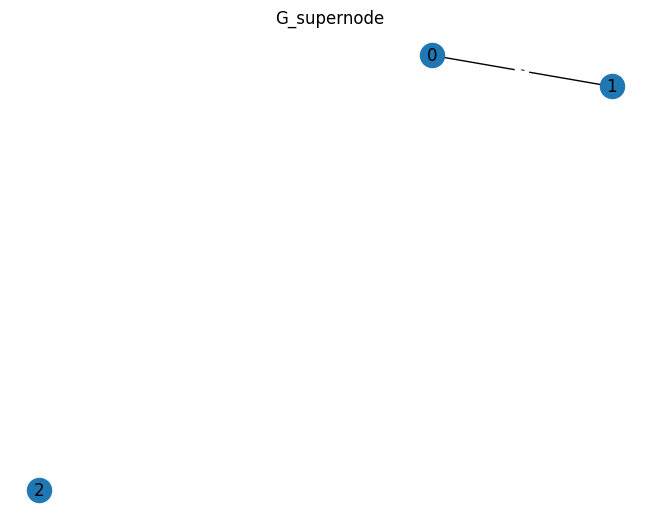

In [56]:
print('Supernodes',G_pos_components)
G_supernode = nx.Graph()


for i, supernode in enumerate(G_pos_components):
    G_supernode.add_node(i, members=supernode)
for i in range(len(G_pos_components)):
    for j in range(i + 1, len(G_pos_components)):
        has_negative_edge = False
        for node1 in G_pos_components[i]:
            for node2 in G_pos_components[j]:
                if GTest.has_edge(node1, node2) and GTest[node1][node2]['sign'] == '-':
                    has_negative_edge = True
                    break
            if has_negative_edge:
                break
        if has_negative_edge:
            G_supernode.add_edge(i, j, sign='-')

#plot
pos = nx.spring_layout(G_supernode)
nx.draw(G_supernode, pos, with_labels=True)
edge_labels = nx.get_edge_attributes(G_supernode, 'sign')
nx.draw_networkx_edge_labels(G_supernode, pos, edge_labels=edge_labels)
plt.title('G_supernode')
plt.show()

4. Identify if there are any cycles containing odd number of negative edges (in the supernode graph created in the previous step). Color the nodes participating in this cycle. You may use networkx function for finding cycles.[10 marks]

No odd negative cycles.


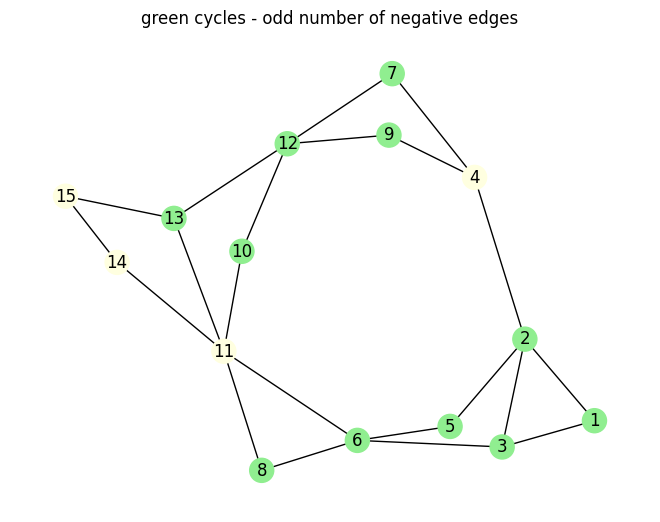

In [61]:
def get_odd_neg_cycles(G):
  cycles = nx.simple_cycles(G)
  odd_neg_cycles = []
  for cycle in cycles:
    neg_count = 0
    for i in range(len(cycle)): #neg
      node1 = cycle[i]
      node2 = cycle[(i + 1) % len(cycle)]
      if G[node1][node2]['sign'] == '-':
        neg_count += 1
    if neg_count % 2 == 1: #odd
      odd_neg_cycles.append(cycle)
  return odd_neg_cycles

odd_neg_cycles = get_odd_neg_cycles(G_supernode)
if len(odd_neg_cycles):
  print("Odd negative cycles.")
  for cycle in odd_neg_cycles:
    print(cycle)
else:
  print("No odd negative cycles.")

node_colors = {}
for node in GTest.nodes():
    node_colors[node] = 'lightyellow'
for i, supernode in enumerate(G_pos_components):
  color = 'lightgreen'
  for cycle in odd_neg_cycles:
    if i in cycle:
      color = 'green'
      break
  for node in supernode:
    node_colors[node] = color

plt.figure()
pos = nx.spring_layout(GTest)
nx.draw(GTest, pos, with_labels=True, node_color=[node_colors[node] for node in GTest.nodes()])
edge_labels = nx.get_edge_attributes(GTest, 'weight')
nx.draw_networkx_edge_labels(GTest, pos, edge_labels=edge_labels)
plt.title('green cycles - odd number of negative edges')
plt.show()



5. Plot the BFS tree of this new graph as shown in Figure 5.16 of the book. [10 marks]

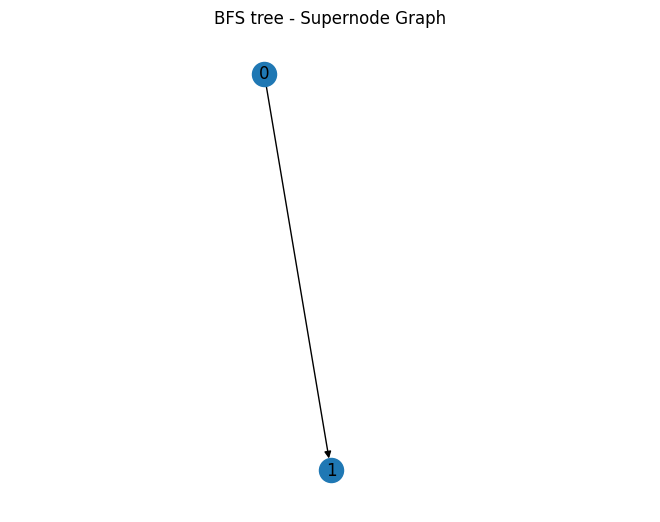

In [62]:
root_node = 0
G_bfs_tree = nx.bfs_tree(G_supernode, source=root_node)

pos = nx.spring_layout(G_bfs_tree)
nx.draw(G_bfs_tree, pos, with_labels=True)
edge_labels = nx.get_edge_attributes(G_bfs_tree, 'weight')
nx.draw_networkx_edge_labels(G_bfs_tree, pos, edge_labels=edge_labels)
plt.title("BFS tree - Supernode Graph")
plt.show()